In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
print(df.head())

features = list(df.columns[:6])
features

y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
clf = clf.fit(X,y)

dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print("Creating graph...")
graph.write_png('abc.png')

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


   Years Experience  Employed?  Previous employers  Level of Education  \
0                10          1                   4                   0   
1                 0          0                   0                   0   
2                 7          0                   6                   0   
3                 2          1                   1                   1   
4                20          0                   2                   2   

   Top-tier school  Interned  Hired  
0                0         0      1  
1                1         1      1  
2                0         0      0  
3                1         0      1  
4                1         0      0  
Creating graph...
[1]
[1]


In [2]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
random_dt = RandomForestClassifier()
random_dt.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
X.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned'],
      dtype='object')

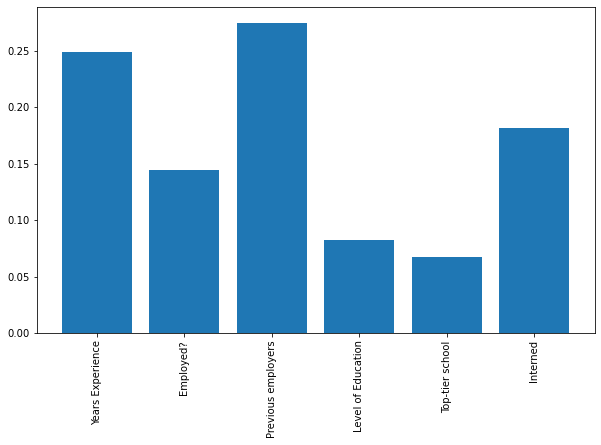

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(X.columns,random_dt.feature_importances_)
plt.xticks(rotation='vertical')
plt.show()